In [ ]:
import pandas
import torch
import torch.nn as nn
from torchsummary import summary


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# BAB inspection

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data/Timeseries_Data_HNX/1.BAB_daily_timeseries.csv')


In [ ]:
df.head()

,Unnamed: 0,Symbol,Market,TradingDate,Time,Open,High,Low,Close,Volume,Value
0,0,BAB,UPCOM,02/01/2019,NaN,13929,13929,13929,13929,6800,140080000.0
1,1,BAB,UPCOM,03/01/2019,NaN,13861,13861,13861,13861,7400,151700000.0
2,2,BAB,UPCOM,04/01/2019,NaN,13794,13794,13794,13794,7300,148920000.0
3,3,BAB,UPCOM,07/01/2019,NaN,13861,13861,13861,13861,11800,241900000.0
4,4,BAB,UPCOM,08/01/2019,NaN,13861,13861,13861,13861,5800,118900000.0


In [ ]:
inspect_df = df[['Symbol', 'Market', 'TradingDate', 'Open', 'High', 'Low', 'Close', 'Volume','Value']]

In [ ]:
inspect_df['TradingDate'] = pd.to_datetime(inspect_df['TradingDate'], format='%d/%m/%Y')
inspect_df.set_index('TradingDate', inplace=True)


<ipython-input-18-e9a792cf2724>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspect_df['TradingDate'] = pd.to_datetime(inspect_df['TradingDate'], format='%d/%m/%Y')


In [ ]:
inspect_df.head()

,Symbol,Market,Open,High,Low,Close,Volume,Value
TradingDate,,,,,,,,
2019-01-02,BAB,UPCOM,13929,13929,13929,13929,6800,140080000.0
2019-01-03,BAB,UPCOM,13861,13861,13861,13861,7400,151700000.0
2019-01-04,BAB,UPCOM,13794,13794,13794,13794,7300,148920000.0
2019-01-07,BAB,UPCOM,13861,13861,13861,13861,11800,241900000.0
2019-01-08,BAB,UPCOM,13861,13861,13861,13861,5800,118900000.0


Text(0, 0.5, 'Volume')

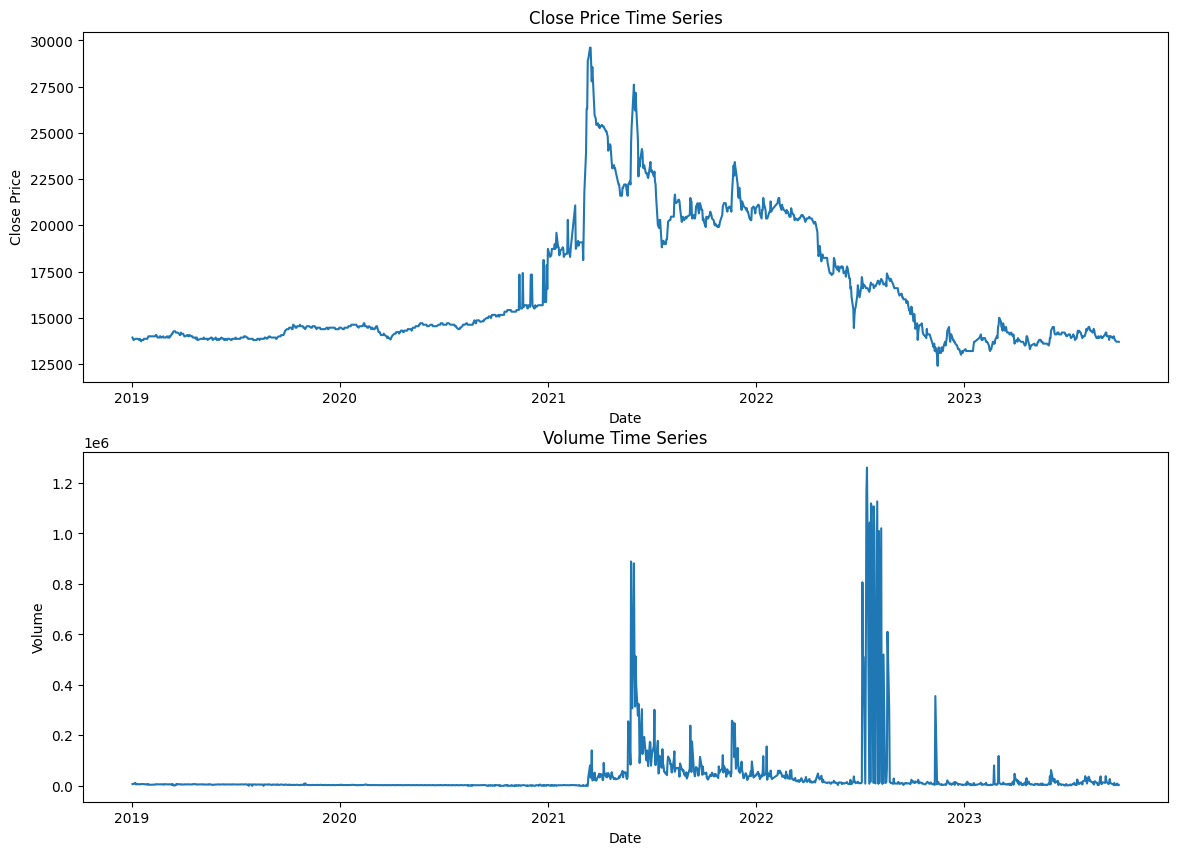

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Close prices and Volume to identify potential outliers
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Close price time series
sns.lineplot(data=inspect_df['Close'], ax=ax[0])
ax[0].set_title('Close Price Time Series')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Close Price')

# Volume time series
sns.lineplot(data=inspect_df['Volume'], ax=ax[1])
ax[1].set_title('Volume Time Series')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volume')


# Data preprocessing

In [ ]:
inspect_df.head()

,Symbol,Market,Open,High,Low,Close,Volume,Value
TradingDate,,,,,,,,
2019-01-02,BAB,UPCOM,13929,13929,13929,13929,6800,140080000.0
2019-01-03,BAB,UPCOM,13861,13861,13861,13861,7400,151700000.0
2019-01-04,BAB,UPCOM,13794,13794,13794,13794,7300,148920000.0
2019-01-07,BAB,UPCOM,13861,13861,13861,13861,11800,241900000.0
2019-01-08,BAB,UPCOM,13861,13861,13861,13861,5800,118900000.0


In [ ]:
#  Check if there is any nan value in inspect_df

nan_count = inspect_df.isna().sum()

print(nan_count)


Symbol    0
Market    0
Open      0
High      0
Low       0
Close     0
Volume    0
Value     0
dtype: int64


**Check distributions of each feature**

In [ ]:
import pandas as pd

# Calculate the mean of each feature
mean = inspect_df[['Open', 'High', 'Low', 'Close', 'Volume']].mean(axis=0)

# Calculate the standard deviation of each feature
std = inspect_df[['Open', 'High', 'Low', 'Close', 'Volume']].std(axis=0)

# Print the results
print("Mean:")
print(mean)
print("\nStandard deviation:")
print(std)


Mean:
Open      16461.808439
High      16583.190717
Low       16313.746835
Close     16456.626160
Volume    37227.728270
dtype: float64

Standard deviation:
Open        3400.548853
High        3476.749155
Low         3273.155001
Close       3369.662163
Volume    125603.202434
dtype: float64


In [ ]:
feature_df = inspect_df[['High', 'Low', 'Close','Volume']]
labels = inspect_df['Close']

**Check correlations between features**:  it seems to be extremely high between high, close and open.

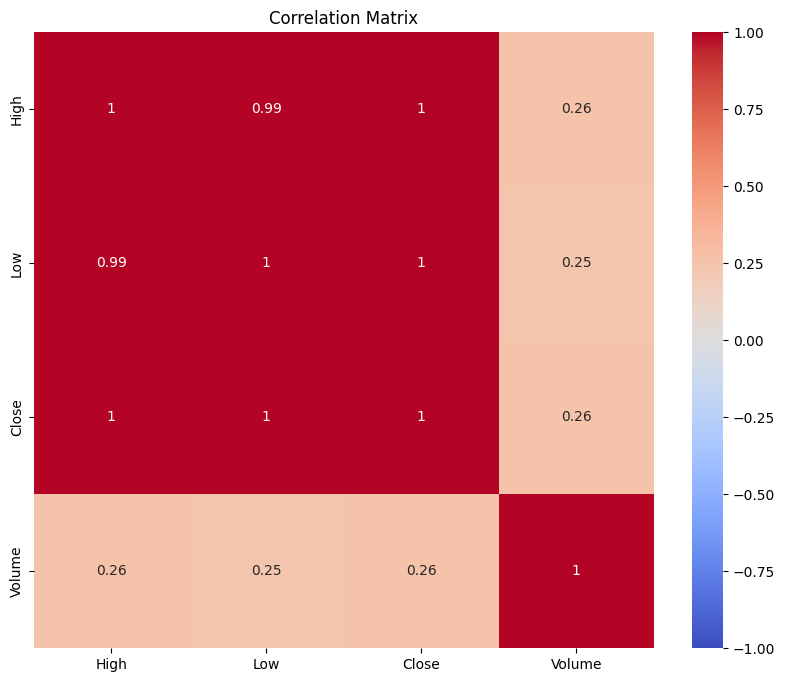

In [ ]:
# Compute the correlation matrix
corr_matrix = feature_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Feature engineering
feature_df['VolumeChange'] = feature_df['Volume'].pct_change()
feature_df['High-Low'] = feature_df['High'] - feature_df['Low']
feature_df.dropna(inplace=True)

<ipython-input-15-904497f9f076>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['VolumeChange'] = feature_df['Volume'].pct_change()
<ipython-input-15-904497f9f076>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['High-Low'] = feature_df['High'] - feature_df['Low']
<ipython-input-15-904497f9f076>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

**Have a peek**

In [ ]:
feature_df.head()

,High,Low,Close,Volume,VolumeChange,High-Low
TradingDate,,,,,,
2019-01-03,13861,13861,13861,7400,0.088235,0
2019-01-04,13794,13794,13794,7300,-0.013514,0
2019-01-07,13861,13861,13861,11800,0.616438,0
2019-01-08,13861,13861,13861,5800,-0.508475,0
2019-01-09,13861,13861,13861,6200,0.068966,0


In [ ]:
unique_high_low = feature_df['High-Low'].nunique()
print(f"There are {unique_high_low} unique values in the 'High-Low' feature.")


There are 84 unique values in the 'High-Low' feature.


**Check if any inf**

In [ ]:

max_values = feature_df.max(axis=0)
print(max_values)


High              31878.0
Low               29614.0
Close             29614.0
Volume          1260800.0
VolumeChange          inf
High-Low           3310.0
dtype: float64


In [ ]:
import numpy as np

feature_df['VolumeChange'] = feature_df['VolumeChange'].replace([np.inf, -np.inf], 1e10)


<ipython-input-19-348b073c813c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['VolumeChange'] = feature_df['VolumeChange'].replace([np.inf, -np.inf], 1e10)


In [ ]:
feature_df

,High,Low,Close,Volume,VolumeChange,High-Low
TradingDate,,,,,,
2019-01-03,13861,13861,13861,7400,0.088235,0
2019-01-04,13794,13794,13794,7300,-0.013514,0
2019-01-07,13861,13861,13861,11800,0.616438,0
2019-01-08,13861,13861,13861,5800,-0.508475,0
2019-01-09,13861,13861,13861,6200,0.068966,0
...,...,...,...,...,...,...
2023-09-25,13800,13700,13700,3900,0.181818,100
2023-09-26,13700,13600,13700,9100,1.333333,100
2023-09-27,13700,13600,13700,4900,-0.461538,100


In [ ]:
# scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(feature_df)


In [ ]:
close_scaler = MinMaxScaler(feature_range=(0, 1))
label = close_scaler.fit_transform(labels.values.reshape(-1, 1))

# TCN-Model

In [ ]:
%pip install pytorch-tcn

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## Create dataset

In [ ]:
def create_dataset(dataset, label, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back-1, :])
        Y.append(label[i + look_back,:])  # Target is the Close price
    return np.array(X), np.array(Y)

In [ ]:
look_back = 30  # Number of previous time steps to consider
X, Y = create_dataset(scaled_data, label, look_back)

In [ ]:
X.shape

(1139, 29, 6)

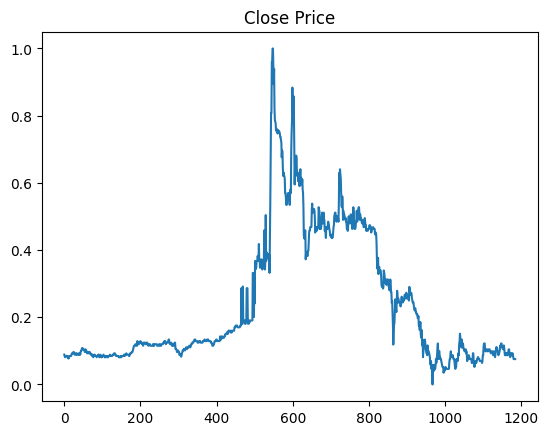

In [ ]:
plt.plot(label)
plt.title('Close Price')
plt.show()


In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

# Convert to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

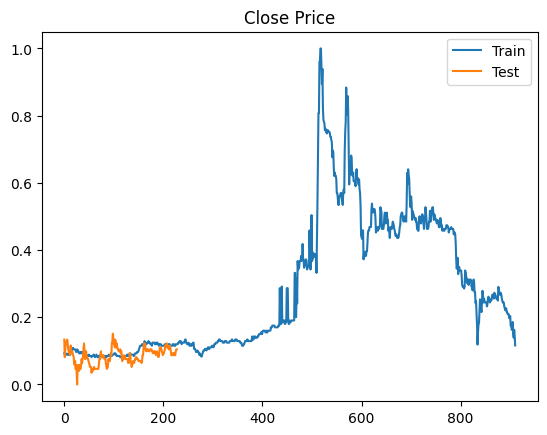

In [ ]:

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.title('Close Price')
plt.legend()
plt.show()


## Define dataset and loader

In [ ]:
from torch.utils.data import Dataset, DataLoader


In [ ]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [ ]:
len(X_train), len(y_train)

(911, 911)

In [ ]:

# Create DataLoaders
batch_size = 90
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## TCN-Model

In [ ]:
from pytorch_tcn import TCN

# Define the TCN model
class TCNModel(nn.Module):
    def __init__(self, input_size, num_channels, kernel_size=4, dropout=0.2):
        super(TCNModel, self).__init__()
        self.tcn = TCN(num_inputs=input_size, num_channels=num_channels, kernel_size=kernel_size, dropout= dropout, use_skip_connections= True)

    def forward(self, x):
        return self.tcn(x.transpose(1, 2)).transpose(0, 1).squeeze(2)

    def inference(self, x):
      # blockwise processing
      # block should be of shape:
      # (1, block_size, num_inputs)
      self.tcn.inference(x)

## Train on BAB

In [ ]:

model = TCNModel(input_size=X_train.shape[2], num_channels=[64, 32, 16, 8, 1])


In [ ]:
summary(model, (1, X_train.shape[2]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       _WeightNorm-1                 [-1, 6, 4]               0
ParametrizedCausalConv1d-2                [-1, 64, 1]           1,600
       _WeightNorm-3                 [-1, 6, 4]               0
       _WeightNorm-4                 [-1, 6, 4]               0
       _WeightNorm-5                 [-1, 6, 4]               0
       _WeightNorm-6                 [-1, 6, 4]               0
              ReLU-7                [-1, 64, 1]               0
           Dropout-8                [-1, 64, 1]               0
       _WeightNorm-9                [-1, 64, 4]               0
ParametrizedCausalConv1d-10                [-1, 64, 1]          16,448
      _WeightNorm-11                [-1, 64, 4]               0
      _WeightNorm-12                [-1, 64, 4]               0
      _WeightNorm-13                [-1, 64, 4]               0
      _WeightNorm-14      

In [ ]:
inputs, targets= next(iter(train_loader))

In [ ]:
inputs.shape, targets.shape

(torch.Size([90, 29, 6]), torch.Size([90, 1]))

In [ ]:
import torch.optim as optim
from sklearn.metrics import mean_squared_error

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
valid_losses = []

# Training loop
num_epochs = 80
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.float(), targets.float()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        test_loss = 0
        predictions, actuals = [], []
        for inputs, targets in test_loader:
            inputs, targets = inputs.float(), targets.float()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

            predictions.append(outputs.numpy())
            actuals.append(targets.numpy())

        test_loss /= len(test_loader)
        valid_losses.append(test_loss)
        print(f'Test Loss: {test_loss:.4f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([90, 1])) that is different to the input size (torch.Size([1, 90, 29])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([11, 1])) that is different to the input size (torch.Size([1, 11, 29])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/80], Loss: 0.1132
Test Loss: 0.0082


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([48, 1])) that is different to the input size (torch.Size([1, 48, 29])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [2/80], Loss: 0.1078
Test Loss: 0.0073
Epoch [3/80], Loss: 0.0799
Test Loss: 0.0082
Epoch [4/80], Loss: 0.1102
Test Loss: 0.0082
Epoch [5/80], Loss: 0.1112
Test Loss: 0.0082
Epoch [6/80], Loss: 0.1092
Test Loss: 0.0082
Epoch [7/80], Loss: 0.0696
Test Loss: 0.0080
Epoch [8/80], Loss: 0.1151
Test Loss: 0.0082
Epoch [9/80], Loss: 0.1090
Test Loss: 0.0082
Epoch [10/80], Loss: 0.1116
Test Loss: 0.0082
Epoch [11/80], Loss: 0.1090
Test Loss: 0.0082
Epoch [12/80], Loss: 0.0574
Test Loss: 0.0048
Epoch [13/80], Loss: 0.0531
Test Loss: 0.0081
Epoch [14/80], Loss: 0.0613
Test Loss: 0.0079
Epoch [15/80], Loss: 0.0332
Test Loss: 0.0034
Epoch [16/80], Loss: 0.0250
Test Loss: 0.0011
Epoch [17/80], Loss: 0.0205
Test Loss: 0.0012
Epoch [18/80], Loss: 0.0182
Test Loss: 0.0011
Epoch [19/80], Loss: 0.0158
Test Loss: 0.0027
Epoch [20/80], Loss: 0.0152
Test Loss: 0.0010
Epoch [21/80], Loss: 0.0132
Test Loss: 0.0010
Epoch [22/80], Loss: 0.0130
Test Loss: 0.0008
Epoch [23/80], Loss: 0.0114
Test Loss: 0.0

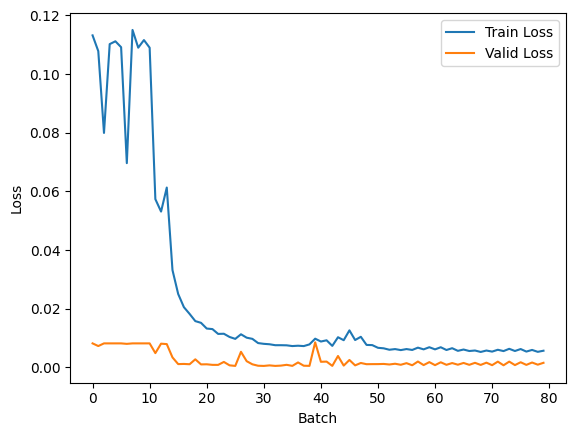

In [ ]:
# Plot the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Test prediction

In [ ]:
# Evaluate the model
model.eval()
test_predict = model(X_test).detach().numpy()

In [ ]:
X_test.shape

torch.Size([228, 29, 6])

In [ ]:
test_predict.shape

(1, 228, 29)

In [ ]:
last_day_prediction = np.array([[period[15]] for period in test_predict[0]])
last_day_prediction.shape

(228, 1)

In [ ]:
predictions = close_scaler.inverse_transform(last_day_prediction)
actuals = close_scaler.inverse_transform(y_test)

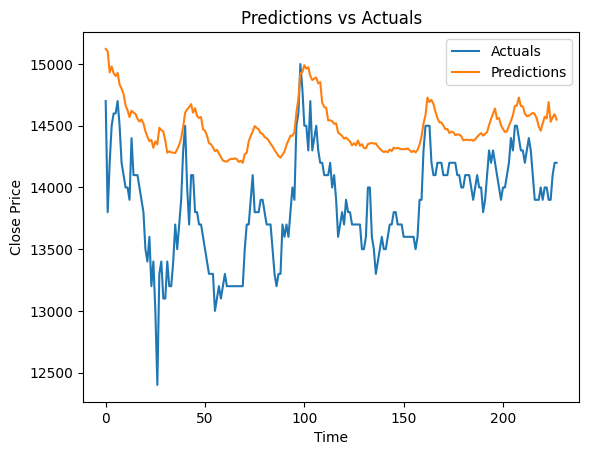

In [ ]:

# Plot predictions vs actuals
plt.plot(actuals, label='Actuals')
plt.plot(predictions, label='Predictions')
plt.title('Predictions vs Actuals')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


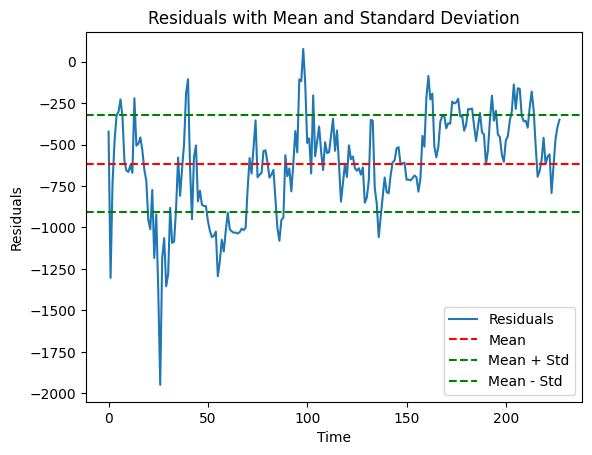

In [ ]:
# Calculate the residuals
residuals = actuals - predictions

# Calculate the mean and standard deviation of the residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

# Plot the residuals with mean and standard deviation lines
plt.plot(residuals, label='Residuals')
plt.axhline(y=mean_residual, color='r', linestyle='--', label='Mean')
plt.axhline(y=mean_residual + std_residual, color='g', linestyle='--', label='Mean + Std')
plt.axhline(y=mean_residual - std_residual, color='g', linestyle='--', label='Mean - Std')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals with Mean and Standard Deviation')
plt.legend()
plt.show()


## Evaluate

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(actuals, predictions)
print('Mean Absolute Percentage Error:', mape)


Mean Absolute Percentage Error: 0.04511633199752653


# Anomaly detection

In [ ]:
# Calculate residuals
residuals = actuals - predictions

# Define a threshold for anomalies
threshold = 3 * np.std(residuals)  # Adjust as needed


In [ ]:
# Identify anomalies
anomalies = residuals[np.abs(residuals) > threshold]
anomalous_points = actuals[np.abs(residuals) > threshold]

In [ ]:
index_array = np.abs(residuals) > threshold
index = [i for i in range(len(index_array)) if index_array[i]]

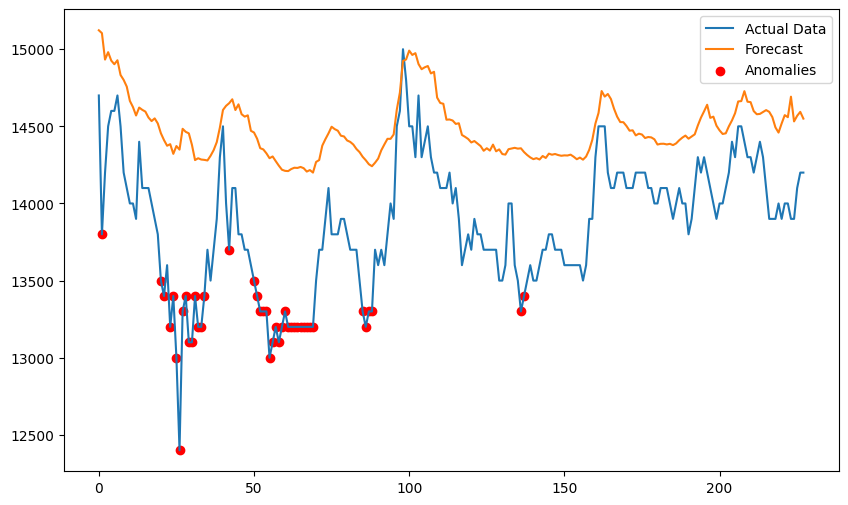

In [ ]:

# Plot anomalies
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual Data')
plt.plot(predictions, label='Forecast')
plt.scatter(index, anomalous_points, color='red', label='Anomalies')
plt.legend()
plt.show()


# Benchmark LSTM

In [ ]:

from torch import nn
import torch.nn.functional as F

class LSTMTimeForecasting(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMTimeForecasting, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, 5)
        self.fc2 = nn.Linear(5, output_dim)

    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)

        # Forward pass
        ula, (h_out, _) = self.lstm(x, (h0, c0))
        h_out = h_out.view(-1, self.hidden_dim)
        out = self.fc1(h_out)
        out = self.fc2(out)

        return out

In [ ]:


# Define the model
model = LSTMTimeForecasting(input_dim=feature_df.shape[1], hidden_dim=64, layer_dim=1, output_dim=1)

# Train the model
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.008)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss after every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


    # Evaluate the model
    model.eval()
    with torch.no_grad():
        test_loss = 0
        predictions, actuals = [], []
        for inputs, targets in test_loader:
            inputs, targets = inputs.float(), targets.float()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

            predictions.append(outputs.numpy())
            actuals.append(targets.numpy())

        test_loss /= len(test_loader)
        valid_losses.append(test_loss)
        print(f'Test Loss: {test_loss:.4f}')





Epoch [1/100], Loss: 0.0610
Test Loss: 0.0620
Test Loss: 0.0191
Test Loss: 0.0333
Test Loss: 0.0259
Test Loss: 0.0006
Test Loss: 0.0121
Test Loss: 0.0016
Test Loss: 0.0057
Test Loss: 0.0017
Test Loss: 0.0047
Epoch [11/100], Loss: 0.0004
Test Loss: 0.0013
Test Loss: 0.0025
Test Loss: 0.0013
Test Loss: 0.0014
Test Loss: 0.0021
Test Loss: 0.0009
Test Loss: 0.0025
Test Loss: 0.0009
Test Loss: 0.0030
Test Loss: 0.0008
Epoch [21/100], Loss: 0.0003
Test Loss: 0.0039
Test Loss: 0.0007
Test Loss: 0.0049
Test Loss: 0.0008
Test Loss: 0.0044
Test Loss: 0.0034
Test Loss: 0.0122
Test Loss: 0.0203
Test Loss: 0.0007
Test Loss: 0.0073
Epoch [31/100], Loss: 0.0009
Test Loss: 0.0019
Test Loss: 0.0018
Test Loss: 0.0012
Test Loss: 0.0025
Test Loss: 0.0016
Test Loss: 0.0019
Test Loss: 0.0017
Test Loss: 0.0022
Test Loss: 0.0013
Test Loss: 0.0032
Epoch [41/100], Loss: 0.0009
Test Loss: 0.0009
Test Loss: 0.0045
Test Loss: 0.0008
Test Loss: 0.0048
Test Loss: 0.0009
Test Loss: 0.0037
Test Loss: 0.0012
Test Loss:

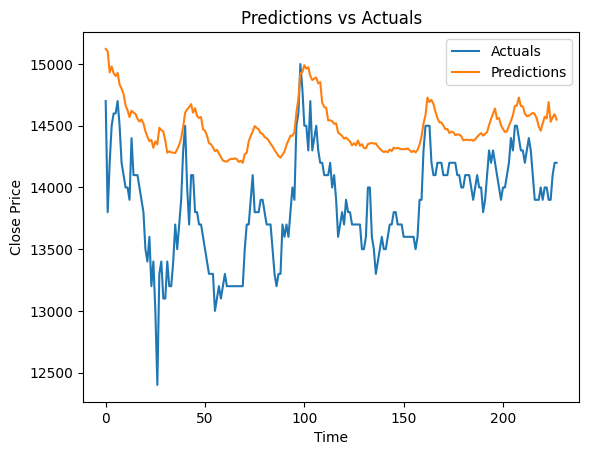

In [ ]:
model.eval()
with torch.no_grad():
    predictions, actuals = [], []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())


    # Convert the predictions and actuals to numpy arrays
    predictions = np.concatenate(predictions, axis=0)
    actuals = np.concatenate(actuals, axis=0)

    predictions = close_scaler.inverse_transform(last_day_prediction)
    actuals = close_scaler.inverse_transform(y_test)

    # Plot the predictions and actuals
    plt.plot(actuals, label='Actuals')
    plt.plot(predictions, label='Predictions')
    plt.title('Predictions vs Actuals')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(actuals, predictions)
print('Mean Absolute Percentage Error:', mape)


Mean Absolute Percentage Error: 0.04511633199752653


# Arima Benchmark

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train the ARIMA model
y_train_np = y_train.numpy()
model = ARIMA(y_train_np, order=(3, 1, 3))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Make predictions
predictions = model_fit.forecast(len(y_test))

In [ ]:
predictions

array([0.11608069, 0.11387685, 0.11035917, 0.10759323, 0.10561438,
       0.10531195, 0.10568621, 0.10693183, 0.10786098, 0.10881061,
       0.108979  , 0.10907123, 0.10859321, 0.10836136, 0.10788892,
       0.10786719, 0.10769292, 0.1079235 , 0.10790841, 0.10817341,
       0.10811239, 0.10827796, 0.10812513, 0.10821875, 0.10804204,
       0.10813855, 0.10799434, 0.108121  , 0.10800836, 0.10814601,
       0.10803899, 0.10816537, 0.10805057, 0.10816264, 0.10804456,
       0.10815086, 0.1080378 , 0.10814428, 0.10803849, 0.10814457,
       0.10804342, 0.10814619, 0.10804717, 0.10814547, 0.10804836,
       0.10814296, 0.10804868, 0.1081406 , 0.10804965, 0.10813917,
       0.10805131, 0.1081382 , 0.10805301, 0.10813709, 0.10805437,
       0.10813575, 0.10805551, 0.10813438, 0.10805664, 0.10813313,
       0.10805783, 0.108132  , 0.10805903, 0.10813091, 0.10806016,
       0.10812981, 0.10806123, 0.10812873, 0.10806227, 0.10812769,
       0.10806328, 0.1081267 , 0.10806426, 0.10812573, 0.10806

In [ ]:

# # Unscale the model and predictions
# unscaled_model = close_scaler.inverse_transform(model)
# unscaled_predictions = close_scaler.inverse_transform(predictions)


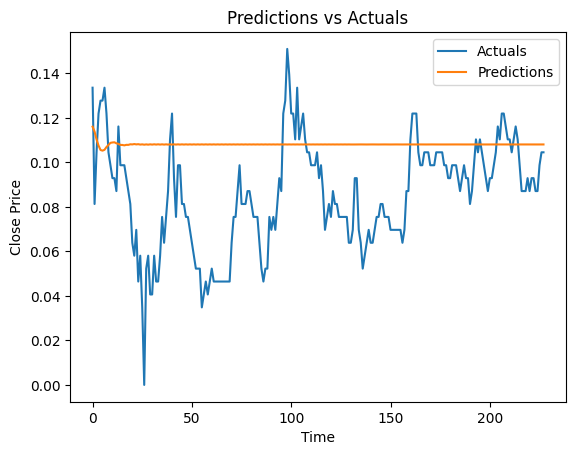

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
# Evaluate the model
# mape = mean_absolute_percentage_error(y_test, predictions)
# print('Mean Absolute Percentage Error:', mape)

# Plot the predictions and actuals
plt.plot(y_test, label='Actuals')
plt.plot(predictions, label='Predictions')
plt.title('Predictions vs Actuals')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
from pmdarima import auto_arima

In [ ]:
model = auto_arima(y_train_np, seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4226.943, Time=4.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4211.220, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4210.090, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4210.051, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4213.219, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4206.836, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4206.425, Time=1.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-4215.636, Time=4.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4208.076, Time=2.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4207.231, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4214.657, Time=3.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-4208.828, Time=0.69 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-4237.636, Time=2.82 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-4230.291, Time=5.25 sec
 ARIMA(3,1,4)(0,0,0

In [ ]:
forecast = model.predict(n_periods=len(y_test))
print('Forecast:', forecast)

Forecast: [0.11680115 0.11551015 0.11289549 0.11083847 0.10957234 0.10991095
 0.11092791 0.11260475 0.11377237 0.11465824 0.11464457 0.11449328
 0.11394492 0.11382057 0.11371214 0.11415955 0.11451519 0.11516549
 0.11546391 0.11587818 0.11590495 0.11611463 0.1160707  0.11632691
 0.11640652 0.11678915 0.11695781 0.11736106 0.11749967 0.11783925
 0.11792057 0.11822161 0.11829987 0.11861801 0.11872895 0.11907203
 0.11919985 0.11954067 0.11965978 0.11998362 0.12009267 0.12040871
 0.12052108 0.12084092 0.12096246 0.12128563 0.12141125 0.1217313
 0.12185582 0.12217058 0.12229471 0.12260687 0.12273367 0.12304553
 0.12317574 0.12348673 0.12361894 0.12392766 0.12406087 0.12436712
 0.12450167 0.12480617 0.12494271 0.1252459  0.12538443 0.12568612
 0.12582627 0.12612619 0.12626776 0.12656594 0.12670904 0.12700568
 0.1271504  0.1274456  0.12759189 0.12788562 0.12803338 0.12832559
 0.12847476 0.12876552 0.1289161  0.12920546 0.12935746 0.12964545
 0.12979884 0.13008547 0.13024019 0.13052549 0.130681

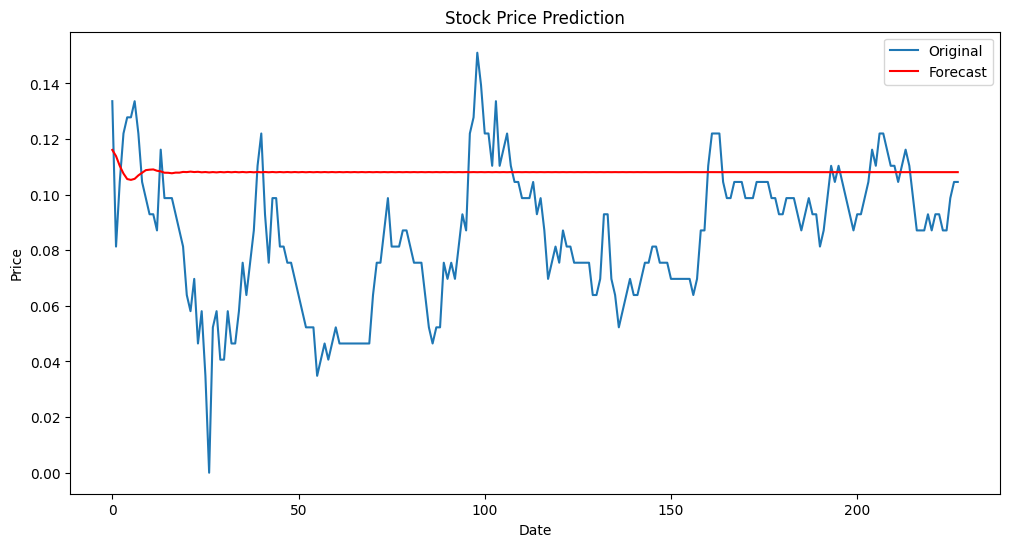

In [ ]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Original')
plt.plot(predictions, label='Forecast', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14043.975, Time=5.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14060.334, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14061.164, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14061.218, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14058.338, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14060.596, Time=3.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14061.795, Time=1.97 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14045.097, Time=5.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14044.964, Time=7.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14063.094, Time=1.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14056.606, Time=2.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14059.073, Time=1.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14031.137, Time=7.21 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=14033.633, Time=5.82 sec
 ARIMA(3,1,4)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


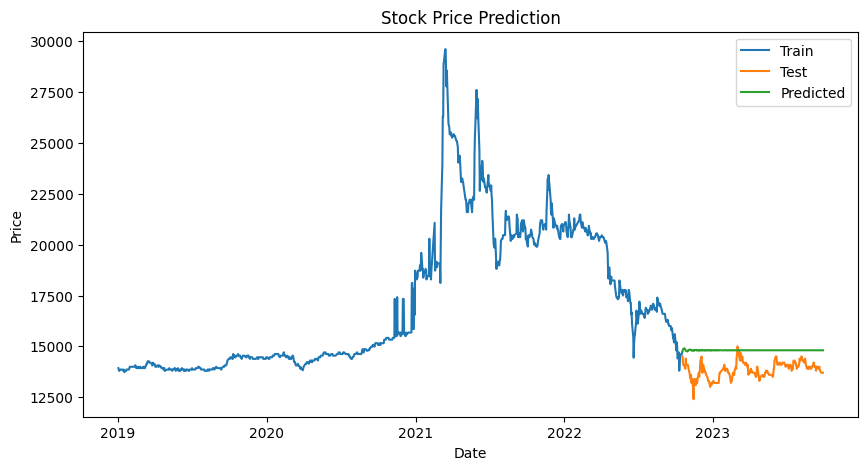

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Load the data
data = pd.read_csv('/content/1.BAB_daily_timeseries.csv')
data['TradingDate'] = pd.to_datetime(data['TradingDate'], format='%d/%m/%Y')
data.set_index('TradingDate', inplace=True)

# Focus on the 'Close' price
prices = data['Close']

# Split the data into training and test sets
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Fit an ARIMA model
model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Make predictions
predictions = model.predict(n_periods=len(test))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


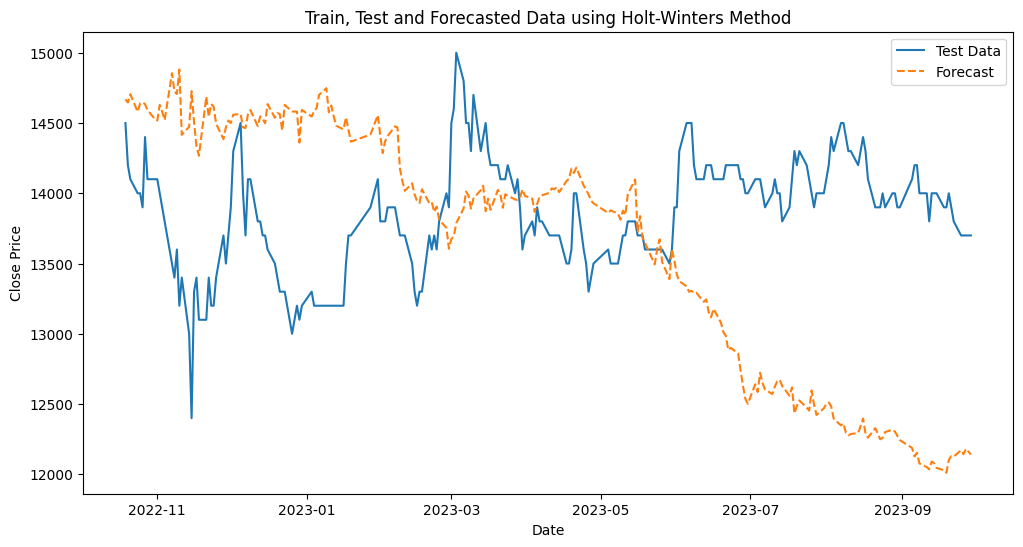

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('/content/drive/MyDrive/data/Timeseries_Data_HNX/1.BAB_daily_timeseries.csv')
data['TradingDate'] = pd.to_datetime(data['TradingDate'], format='%d/%m/%Y')
data.set_index('TradingDate', inplace=True)

# Focus on the 'Close' price
prices = data['Close']

# Split the data into training and test sets
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Fit the model
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365, trend='add', damped_trend=True).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


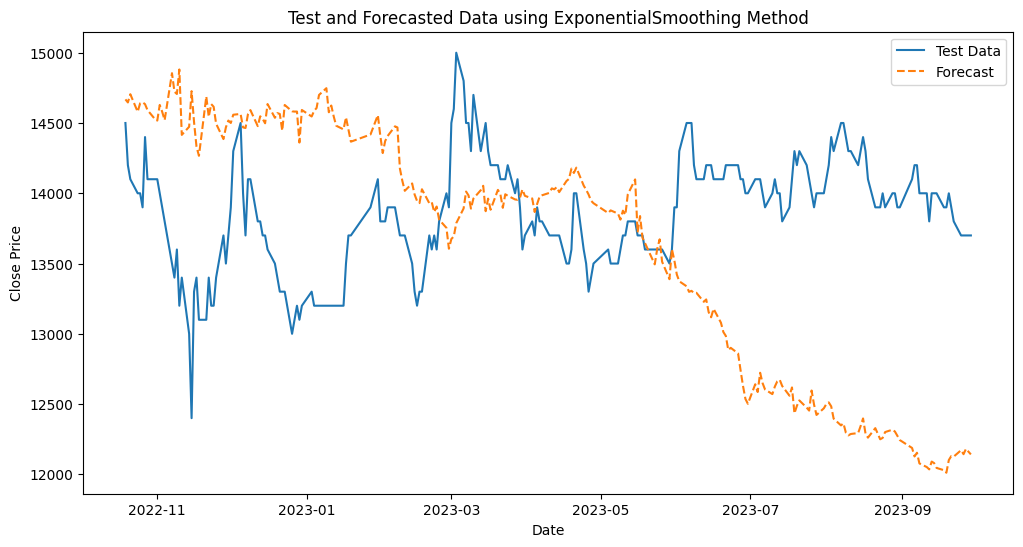

In [ ]:

# Forecast the test set
predictions = model.forecast(len(test))

# Plot the results
plt.figure(figsize=(12, 6))
# plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predictions, label='Forecast', linestyle='--')
plt.title('Test and Forecasted Data using Exponential Smoothing Method')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Calculate the MAPE
mape = mean_absolute_percentage_error(test, predictions)

# Calculate the MSE
mse = mean_squared_error(test, predictions)

# Print the results
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")


MAPE: 0.07%
MSE: 1309553.05


# Now let's train on all the data

In [ ]:
input_features = 6
my_model = TCNModel(input_size=input_features, num_channels=[ 128, 64, 64, 32, 16, 8, 1])


In [ ]:
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import os


data_folder = '/content/drive/MyDrive/data/Timeseries_Data/'

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(my_model.parameters(), lr=0.0001)
train_losses = []
valid_losses = []

banking_list =['ACB', 'BID', 'CTG', 'EIB', 'HDB', 'LPB', 'MBB', 'MSB', 'NAB', 'OCB', 'SHB', 'SSB', 'STB', 'TCB', 'TPB', 'VCB', 'VIB', 'VPB']


# Loop through the CSV files in the folder
for filename in os.listdir(data_folder):
    # Read the CSV file into a dataframe
    df = pd.read_csv(os.path.join(data_folder, filename))
    if df['Symbol'].iloc[0] not in banking_list:
      continue

    inspect_df = df[['Symbol', 'Market', 'TradingDate', 'Open', 'High', 'Low', 'Close', 'Volume','Value']]
    inspect_df['TradingDate'] = pd.to_datetime(inspect_df['TradingDate'], format='%d/%m/%Y')
    inspect_df.set_index('TradingDate', inplace=True)

    # separate
    feature_df = inspect_df[['High','Low','Volume','Close']]
    labels = inspect_df['Close']

    # Feature engineering
    feature_df['VolumeChange'] = feature_df['Volume'].pct_change()
    feature_df['High-Low'] = feature_df['High'] - feature_df['Low']
    feature_df.dropna(inplace=True)


    # potential inf values replace them
    feature_df['VolumeChange'] = feature_df['VolumeChange'].replace([np.inf, -np.inf], 1e10)

    # add date features

    # Add day of the week feature
    feature_df['DayOfTheWeek'] = feature_df.index.day_name()

    # Add current month feature
    feature_df['CurrentMonth'] = feature_df.index.month

    # Encode day of the week feature
    day_of_week_encoding = pd.get_dummies(feature_df['DayOfTheWeek'], drop_first=True)

    # Encode current month feature
    month_encoding = pd.get_dummies(feature_df['CurrentMonth'], drop_first=True)

    # Concatenate encoded features with original features
    feature_df = pd.concat([feature_df, day_of_week_encoding, month_encoding], axis=1)

    # Drop the original categorical features
    feature_df.drop(['DayOfTheWeek', 'CurrentMonth'], axis=1, inplace=True)


    # scaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(feature_df)

    close_scaler = MinMaxScaler(feature_range=(0, 1))
    label = close_scaler.fit_transform(labels.values.reshape(-1, 1))

    # define data

    look_back = 30  # Number of previous time steps to consider
    X, Y = create_dataset(scaled_data, label, look_back)

    # split
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = Y[:train_size], Y[train_size:]
    print(len(X_test))

    # Convert to PyTorch tensors
    X_train = torch.from_numpy(X_train).float()
    X_test = torch.from_numpy(X_test).float()
    y_train = torch.from_numpy(y_train).float()
    y_test = torch.from_numpy(y_test).float()

    # Create DataLoaders
    batch_size = 90
    train_dataset = TimeSeriesDataset(X_train, y_train)
    test_dataset = TimeSeriesDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # training
    print(f"----- training {filename} --------")

    num_epochs = 5
    for epoch in range(num_epochs):
      my_model.train()
      train_loss = 0
      for batch_idx, (inputs, targets) in enumerate(train_loader):
          inputs, targets = inputs.float(), targets.float()

          # Forward pass
          outputs = my_model(inputs)
          loss = criterion(outputs, targets)

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          train_loss += loss.item()

      train_loss /= len(train_loader)
      train_losses.append(train_loss)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

      # Evaluate the model
      my_model.eval()
      with torch.no_grad():
          test_loss = 0
          predictions, actuals = [], []
          for inputs, targets in test_loader:

              inputs, targets = inputs.float(), targets.float()
              outputs = my_model(inputs)
              loss = criterion(outputs, targets)
              test_loss += loss.item()

              predictions.append(outputs.numpy())
              actuals.append(targets.numpy())

          test_loss /= len(test_loader)
          valid_losses.append(test_loss)
          print(f'Test Loss: {test_loss:.4f}')



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data/Timeseries_Data/'

## Prediction

In [ ]:


# Save the model and optimizer state
torch.save({
    'model_state_dict': my_model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_losses': train_losses,
    'valid_losses': valid_losses
}, '/content/drive/MyDrive/model_and_optimizer.pt')


In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# prompt: Try to use the model to predict on BAB sotck

# Load the model and optimizer state
checkpoint = torch.load('/content/drive/MyDrive/model_and_optimizer.pt')
my_model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
train_losses = checkpoint['train_losses']
valid_losses = checkpoint['valid_losses']

# Load the BAB data
df = pd.read_csv('/content/drive/MyDrive/data/Timeseries_Data_HNX/1.BAB_daily_timeseries.csv')
feature_df = df[['High','Low','Volume']]
labels = inspect_df['Close']

# Feature engineering
feature_df['VolumeChange'] = feature_df['Volume'].pct_change()
feature_df['High-Low'] = feature_df['High'] - feature_df['Low']
feature_df.dropna(inplace=True)

# potential inf values replace them
feature_df['VolumeChange'] = feature_df['VolumeChange'].replace([np.inf, -np.inf], 1e10)

# scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(feature_df)

close_scaler = MinMaxScaler(feature_range=(0, 1))
label = close_scaler.fit_transform(labels.values.reshape(-1, 1))

# define data
look_back = 30  # Number of previous time steps to consider
X, Y = create_dataset(scaled_data, label, look_back)

train_size = int(len(X) * 0.2)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]
# Create DataLoaders
batch_size = 90
test_dataset = TimeSeriesDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Test prediction

In [ ]:
num_epochs = 20
for epoch in range(num_epochs):
  my_model.train()
  train_loss = 0
  for batch_idx, (inputs, targets) in enumerate(train_loader):
      inputs, targets = inputs.float(), targets.float()

      # Forward pass
      outputs = my_model(inputs)
      loss = criterion(outputs, targets)

      # Backward pass and optimization
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss += loss.item()

  train_loss /= len(train_loader)
  train_losses.append(train_loss)
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

  # Evaluate the model
  my_model.eval()
  with torch.no_grad():
      test_loss = 0
      predictions, actuals = [], []
      for inputs, targets in test_loader:

          inputs, targets = inputs.float(), targets.float()
          outputs = my_model(inputs)
          loss = criterion(outputs, targets)
          test_loss += loss.item()

          predictions.append(outputs.numpy())
          actuals.append(targets.numpy())

      test_loss /= len(test_loader)
      valid_losses.append(test_loss)
      print(f'Test Loss: {test_loss:.4f}')



In [ ]:
X_train.shape

In [ ]:
# Evaluate the model
my_model.eval()
test_predict = my_model(X_test).detach().numpy()

In [ ]:
test_predict.shape

In [ ]:
Y.shape

In [ ]:
last_day_prediction = np.array([[period[15]] for period in test_predict[0]])
last_day_prediction.shape

In [ ]:
predictions = close_scaler.inverse_transform(last_day_prediction)
actuals = close_scaler.inverse_transform(y_test)

In [ ]:

# Plot predictions vs actuals
plt.plot(actuals, label='Actuals')
plt.plot(predictions, label='Predictions')
plt.title('Predictions vs Actuals')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Forbidden Darts stuff (pip install Darts when use)

In [ ]:
import darts
from darts import TimeSeries

# Load the data
series = TimeSeries.from_dataframe(df, time_col='TradingDate', value_cols='Close',  freq='D', fill_missing_dates=True, fillna_value=0)


In [ ]:
series

In [ ]:
# Split the data into training and validation sets
train, val = series.split_before(split_point=pandas.Timestamp("01-01-2023"))

In [ ]:
import matplotlib.pyplot as plt

train.plot(label='Training')
val.plot(label='Validation')
plt.title('Train and Validation Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
from darts.models import TCNModel

# Create a Temporal CNN model
model = darts.models.TCNModel(input_chunk_length=30, output_chunk_length=10, num_filters=32, num_layers=10, kernel_size=3, weight_norm=True, n_epochs=80)



In [ ]:
val

In [ ]:
model.model_params

In [ ]:
# Train the model
model.fit(train, val_series=val)


In [ ]:
# Make predictions
forecast = model.predict(len(val))

In [ ]:
# Plot the result
forecast.plot()
val.plot()